請實做以下兩種不同feature的模型，回答第 (1) ~ (3) 題：

(1) 抽全部9小時內的污染源feature當作一次項(加bias)  
(2) 抽全部9小時內pm2.5的一次項當作feature(加bias)

    備註 : 
      1. NR請皆設為0，其他的數值不要做任何更動
      2. 所有 advanced 的 gradient descent 技術(如: adam, adagrad 等) 都是可以用的
      3. 第1-3題請都以題目給訂的兩種model來回答
      4. 同學可以先把model訓練好，kaggle死線之後便可以無限上傳。
      5. 根據助教時間的公式表示，(1) 代表 p = 9x18+1 而(2) 代表 p = 9*1+1
      
1. (2%)記錄誤差值 (RMSE)(根據kaggle public+private分數)，討論兩種feature的影響

2. (1%)將feature從抽前9小時改成抽前5小時，討論其變化

3. (1%)Regularization on all the weight with λ=0.1、0.01、0.001、0.0001，並作圖
      
4. (1%)在線性回歸問題中，假設有 N 筆訓練資料，每筆訓練資料的特徵 (feature) 為一向量 xn，其標註(label)為一純量 yn，模型參數為一向量w (此處忽略偏權值 b)，則線性回歸的損失函數(loss function)為n=1Nyn-xnw2 。若將所有訓練資料的特徵值以矩陣 X = [x1 x2 … xN]T 表示，所有訓練資料的標註以向量 y = [y1 y2 … yN]T表示，請問如何以 X 和 y 表示可以最小化損失函數的向量 w ？請選出正確答案。(其中XTX為invertible)

        (A) (XTX)XTy
        (B) (XTX)yXT
        (C) (XTX)-1XTy
        (D) (XTX)-1yXT

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ml2019spring-hw1/sampleSubmission.csv
/kaggle/input/ml2019spring-hw1/train.csv
/kaggle/input/ml2019spring-hw1/test.csv


In [2]:
import numpy as np
import pandas as pd
import csv

#### (1) 抽全部9小時內的污染源feature當作一次項(加bias)

In [3]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
x = np.empty(shape = (12 * 471 , 18 * 9),dtype = float)
y = np.empty(shape = (12 * 471 , 1),dtype = float)

for month in range(12): 
    for day in range(20): 
        for hour in range(24):   
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour,:] = month_to_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1,-1) 
            y[month * 471 + day * 24 + hour,0] = month_to_data[month][9 ,day * 24 + hour + 9]
x.shape, y.shape

((5652, 162), (5652, 1))

In [4]:
mean = np.mean(x, axis = 0) 
std = np.std(x, axis = 0)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if not std[j] == 0 :
            x[i][j] = (x[i][j]- mean[j]) / std[j]

In [5]:
dim = x.shape[1] + 1 
w = np.zeros(shape = (dim, 1 ))
x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
learning_rate = np.array([[200]] * dim)
adagrad_sum = np.zeros(shape = (dim, 1 ))
 
for T in range(10000):
    if(T % 500 == 0 ):
        print("T=",T)
        print("Loss:",np.power(np.sum(np.power(x.dot(w) - y, 2 ))/ x.shape[0],0.5))
    gradient = (-2) * np.transpose(x).dot(y-x.dot(w))
    adagrad_sum += gradient ** 2
    w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)

T= 0
Loss: 27.071214829194115
T= 500
Loss: 15.303358672239398
T= 1000
Loss: 9.957336253580277
T= 1500
Loss: 7.879329888549475
T= 2000
Loss: 6.861485712171394
T= 2500
Loss: 6.339003480940456
T= 3000
Loss: 6.060560050269416
T= 3500
Loss: 5.9069391516050365
T= 4000
Loss: 5.819427069726108
T= 4500
Loss: 5.768117525889319
T= 5000
Loss: 5.737251324218732
T= 5500
Loss: 5.718247893619341
T= 6000
Loss: 5.70629462196756
T= 6500
Loss: 5.698621259127973
T= 7000
Loss: 5.693596789769688
T= 7500
Loss: 5.690241610223954
T= 8000
Loss: 5.687956629045993
T= 8500
Loss: 5.686369228004013
T= 9000
Loss: 5.685243884510883
T= 9500
Loss: 5.684429390954337


In [6]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 

In [7]:
test_x = np.empty(shape = (240, 18 * 9),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[18 * i : 18 * (i+1),:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)
answer = test_x.dot(w)

In [8]:
f = open('submission.csv',"w")
w = csv.writer(f)
title = ['id','value']
w.writerow(title) 
for i in range(240):
    content = ['id_'+str(i),answer[i][0]]
    w.writerow(content) 

=> score:5.65650

#### 抽全部9小時內pm2.5的一次項當作feature(加bias)

In [9]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
x = np.empty(shape = (12 * 471 , 9),dtype = float)
y = np.empty(shape = (12 * 471 , 1),dtype = float)

for month in range(12): 
    for day in range(20): 
        for hour in range(24):   
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour,:] = month_to_data[month][9, day * 24 + hour : day * 24 + hour + 9].reshape(1,-1) 
            y[month * 471 + day * 24 + hour,0] = month_to_data[month][9, day * 24 + hour + 9]
x.shape, y.shape

((5652, 9), (5652, 1))

In [10]:
mean = np.mean(x, axis = 0) 
std = np.std(x, axis = 0)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if not std[j] == 0 :
            x[i][j] = (x[i][j]- mean[j]) / std[j]

In [11]:
dim = x.shape[1] + 1 
w = np.zeros(shape = (dim, 1 ))
x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
learning_rate = np.array([[200]] * dim)
adagrad_sum = np.zeros(shape = (dim, 1 ))
 
for T in range(10000):
    if(T % 500 == 0 ):
        print("T=",T)
        print("Loss:",np.power(np.sum(np.power(x.dot(w) - y, 2 ))/ x.shape[0],0.5))
    gradient = (-2) * np.transpose(x).dot(y-x.dot(w))
    adagrad_sum += gradient ** 2
    w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)

T= 0
Loss: 27.071214829194115
T= 500
Loss: 6.1332103618860625
T= 1000
Loss: 6.123265003043738
T= 1500
Loss: 6.123028371018228
T= 2000
Loss: 6.123021754567614
T= 2500
Loss: 6.123021531336926
T= 3000
Loss: 6.123021522494552
T= 3500
Loss: 6.1230215221070345
T= 4000
Loss: 6.12302152208915
T= 4500
Loss: 6.123021522088305
T= 5000
Loss: 6.123021522088265
T= 5500
Loss: 6.123021522088262
T= 6000
Loss: 6.123021522088262
T= 6500
Loss: 6.123021522088262
T= 7000
Loss: 6.123021522088262
T= 7500
Loss: 6.123021522088262
T= 8000
Loss: 6.123021522088262
T= 8500
Loss: 6.123021522088262
T= 9000
Loss: 6.123021522088262
T= 9500
Loss: 6.123021522088262


In [12]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 

In [13]:
test_x = np.empty(shape = (240, 9),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[i * 18 + 9,:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)
answer = test_x.dot(w)

In [14]:
f = open('submission.csv',"w")
w = csv.writer(f)
title = ['id','value']
w.writerow(title) 
for i in range(240):
    content = ['id_'+str(i),answer[i][0]]
    w.writerow(content) 

=> score:5.90263

1. (2%)記錄誤差值 (RMSE)(根據kaggle public+private分數)，討論兩種feature的影響  
  - 5.65650(使用全部) v.s. 5.90263(只使用PM2.5)
  
      只使用前PM2.5的在testing data表現比trainning好

2. (1%)將feature從抽前9小時改成抽前5小時，討論其變化

#### (1) 抽全部5小時內的污染源feature當作一次項(加bias)

In [15]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
x = np.empty(shape = (12 * 475 , 18 * 5),dtype = float)
y = np.empty(shape = (12 * 475 , 1),dtype = float)

for month in range(12): 
    for day in range(20): 
        for hour in range(24):   
            if day == 19 and hour > 18:
                continue
            x[month * 475 + day * 24 + hour,:] = month_to_data[month][:,day * 24 + hour : day * 24 + hour + 5].reshape(1,-1) 
            y[month * 475 + day * 24 + hour,0] = month_to_data[month][9 ,day * 24 + hour + 5]
x.shape, y.shape

((5700, 90), (5700, 1))

In [16]:
mean = np.mean(x, axis = 0) 
std = np.std(x, axis = 0)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if not std[j] == 0 :
            x[i][j] = (x[i][j]- mean[j]) / std[j]

In [17]:
dim = x.shape[1] + 1 
w = np.zeros(shape = (dim, 1 ))
x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
learning_rate = np.array([[200]] * dim)
adagrad_sum = np.zeros(shape = (dim, 1 ))
 
for T in range(10000):
    if(T % 500 == 0 ):
        print("T=",T)
        print("Loss:",np.power(np.sum(np.power(x.dot(w) - y, 2 ))/ x.shape[0],0.5))
    gradient = (-2) * np.transpose(x).dot(y-x.dot(w))
    adagrad_sum += gradient ** 2
    w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)

T= 0
Loss: 27.069300278061487
T= 500
Loss: 10.29073326042208
T= 1000
Loss: 7.046920069982195
T= 1500
Loss: 6.191543899341942
T= 2000
Loss: 5.937749267657019
T= 2500
Loss: 5.856301242070615
T= 3000
Loss: 5.827447154745556
T= 3500
Loss: 5.816217904712471
T= 4000
Loss: 5.811475826487308
T= 4500
Loss: 5.809318880574833
T= 5000
Loss: 5.808259666745374
T= 5500
Loss: 5.807691663026502
T= 6000
Loss: 5.8073542116274
T= 6500
Loss: 5.80713040739789
T= 7000
Loss: 5.806965800939391
T= 7500
Loss: 5.806834094386907
T= 8000
Loss: 5.806722107974225
T= 8500
Loss: 5.806622974002278
T= 9000
Loss: 5.8065329602006885
T= 9500
Loss: 5.8064499417239475


In [18]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 

In [19]:
test_x = np.empty(shape = (240, 18 * 5),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[18 * i : 18 * (i+1),-5:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)
answer = test_x.dot(w)

In [20]:
f = open('submission.csv',"w")
w = csv.writer(f)
title = ['id','value']
w.writerow(title) 
for i in range(240):
    content = ['id_'+str(i),answer[i][0]]
    w.writerow(content) 

=> score:5.96405，train score與test score微幅上升

#### (2) 抽全部5小時內pm2.5的一次項當作feature(加bias)

In [21]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
x = np.empty(shape = (12 * 475 , 5),dtype = float)
y = np.empty(shape = (12 * 475 , 1),dtype = float)

for month in range(12): 
    for day in range(20): 
        for hour in range(24):   
            if day == 19 and hour > 14:
                continue
            x[month * 475 + day * 24 + hour,:] = month_to_data[month][9, day * 24 + hour : day * 24 + hour + 5].reshape(1,-1) 
            y[month * 475 + day * 24 + hour,0] = month_to_data[month][9, day * 24 + hour + 5]
x.shape, y.shape

((5700, 5), (5700, 1))

In [22]:
mean = np.mean(x, axis = 0) 
std = np.std(x, axis = 0)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if not std[j] == 0 :
            x[i][j] = (x[i][j]- mean[j]) / std[j]

In [23]:
dim = x.shape[1] + 1 
w = np.zeros(shape = (dim, 1 ))
x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
learning_rate = np.array([[200]] * dim)
adagrad_sum = np.zeros(shape = (dim, 1 ))
for T in range(10000):
    if(T % 500 == 0 ):
        print("T=",T)
        print("Loss:",np.power(np.sum(np.power(x.dot(w) - y, 2 ))/ x.shape[0],0.5))
    gradient = (-2) * np.transpose(x).dot(y-x.dot(w))
    adagrad_sum += gradient ** 2
    w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)

T= 0
Loss: 26.964730049949818
T= 500
Loss: 6.186472324045475
T= 1000
Loss: 6.1864213418364145
T= 1500
Loss: 6.186421337055632
T= 2000
Loss: 6.186421337055159
T= 2500
Loss: 6.186421337055159
T= 3000
Loss: 6.186421337055159
T= 3500
Loss: 6.18642133705516
T= 4000
Loss: 6.186421337055159
T= 4500
Loss: 6.186421337055159
T= 5000
Loss: 6.186421337055159
T= 5500
Loss: 6.186421337055159
T= 6000
Loss: 6.186421337055159
T= 6500
Loss: 6.186421337055159
T= 7000
Loss: 6.186421337055159
T= 7500
Loss: 6.186421337055159
T= 8000
Loss: 6.186421337055159
T= 8500
Loss: 6.186421337055159
T= 9000
Loss: 6.186421337055159
T= 9500
Loss: 6.186421337055159


In [24]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 

In [25]:
test_x = np.empty(shape = (240, 5),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[i * 18 + 9,-5:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)
answer = test_x.dot(w)

In [26]:
f = open('submission.csv',"w")
w = csv.writer(f)
title = ['id','value']
w.writerow(title) 
for i in range(240):
    content = ['id_'+str(i),answer[i][0]]
    w.writerow(content) 

=> socre:6.22573，train score微幅上升，test score上升0.3，testing表現的較trainning差

3. (1%)Regularization on all the weight with λ=0.1、0.01、0.001、0.0001，並作圖

=> 使用全部5小時內的污染源feature當作一次項

In [27]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
lamdas = [0.1, 0.01, 0.001, 0.0001, 0]
loss_by_lamda = []
w_by_lamda = []
 
for index, lamda in enumerate(lamdas):
    x = np.empty(shape = (12 * 475 , 18 * 5),dtype = float)
    y = np.empty(shape = (12 * 475 , 1),dtype = float)
    for month in range(12): 
        for day in range(20): 
            for hour in range(24):   
                if day == 19 and hour > 18:
                    continue
                x[month * 475 + day * 24 + hour,:] = month_to_data[month][:,day * 24 + hour : day * 24 + hour + 5].reshape(1,-1) 
                y[month * 475 + day * 24 + hour,0] = month_to_data[month][9 ,day * 24 + hour + 5]
    mean = np.mean(x, axis = 0) 
    std = np.std(x, axis = 0)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if not std[j] == 0 :
                x[i][j] = (x[i][j]- mean[j]) / std[j]
    dim = x.shape[1] + 1 
    w = np.zeros(shape = (dim, 1 ))
    x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    learning_rate = np.array([[200]] * dim)
    adagrad_sum = np.zeros(shape = (dim, 1 ))
    loss = []
    for T in range(10000):
        if(T % 500 == 0 ):
            print("T=",T)
            print("Loss:", np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        loss.append(np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        gradient = (-2) * np.transpose(x).dot(y-x.dot(w)) + 2 * lamda * np.sum(w)
        adagrad_sum += gradient ** 2
        w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)
    loss_by_lamda.append(loss[-1])
    w_by_lamda.append(w)

T= 0
Loss: 27.069300278061487
T= 500
Loss: 10.299676425778006
T= 1000
Loss: 7.051016523076887
T= 1500
Loss: 6.193819498905969
T= 2000
Loss: 5.939396562492837
T= 2500
Loss: 5.857721039466232
T= 3000
Loss: 5.828774533757347
T= 3500
Loss: 5.817502680502469
T= 4000
Loss: 5.812738638120796
T= 4500
Loss: 5.8105693106803065
T= 5000
Loss: 5.809502635782152
T= 5500
Loss: 5.808929921726902
T= 6000
Loss: 5.808589409424636
T= 6500
Loss: 5.808363591643837
T= 7000
Loss: 5.808197668805315
T= 7500
Loss: 5.8080651288321645
T= 8000
Loss: 5.807952655455644
T= 8500
Loss: 5.807853291005967
T= 9000
Loss: 5.807763242151428
T= 9500
Loss: 5.807680341473414
T= 0
Loss: 27.069300278061487
T= 500
Loss: 10.291627869229554
T= 1000
Loss: 7.047329752111883
T= 1500
Loss: 6.191771420131311
T= 2000
Loss: 5.937913937998011
T= 2500
Loss: 5.856443155806985
T= 3000
Loss: 5.827579823183915
T= 3500
Loss: 5.816346310369325
T= 4000
Loss: 5.8116020335700505
T= 4500
Loss: 5.809443847412385
T= 5000
Loss: 5.808383885362669
T= 5500
L

In [28]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 
test_x = np.empty(shape = (240, 18 * 5),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[18 * i : 18 * (i+1),-5:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)

for i, w in enumerate(w_by_lamda):
    answer = test_x.dot(w)
    f = open('submission{}.csv'.format(i),"w")
    wr = csv.writer(f)
    title = ['id','value']
    wr.writerow(title) 
    for i in range(240):
        content = ['id_'+str(i),answer[i][0]]
        wr.writerow(content) 

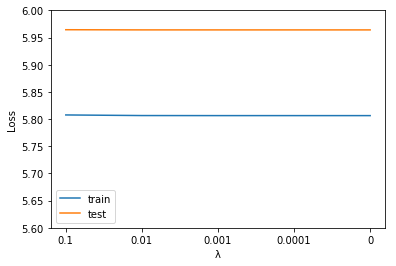

In [29]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(list(range(5)), loss_by_lamda)
ax.plot(list(range(5)), [5.96438, 5.96408, 5.96405, 5.96405, 5.96405])
ax.ticklabel_format(useOffset=False)
plt.ylim((5.6, 6)) 
plt.xticks(list(range(5)), [str(i) for i in lamdas])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

結果並不明顯  
=> 使用λ=1000、100、10、1、0重做一次

In [30]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
lamdas = [1000, 100, 10, 1, 0]
loss_by_lamda = []
w_by_lamda = []
 
for index, lamda in enumerate(lamdas):
    x = np.empty(shape = (12 * 475 , 18 * 5),dtype = float)
    y = np.empty(shape = (12 * 475 , 1),dtype = float)
    for month in range(12): 
        for day in range(20): 
            for hour in range(24):   
                if day == 19 and hour > 18:
                    continue
                x[month * 475 + day * 24 + hour,:] = month_to_data[month][:,day * 24 + hour : day * 24 + hour + 5].reshape(1,-1) 
                y[month * 475 + day * 24 + hour,0] = month_to_data[month][9 ,day * 24 + hour + 5]
    mean = np.mean(x, axis = 0) 
    std = np.std(x, axis = 0)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if not std[j] == 0 :
                x[i][j] = (x[i][j]- mean[j]) / std[j]
    dim = x.shape[1] + 1 
    w = np.zeros(shape = (dim, 1 ))
    x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    learning_rate = np.array([[200]] * dim)
    adagrad_sum = np.zeros(shape = (dim, 1 ))
    loss = []
    for T in range(10000):
        if(T % 500 == 0 ):
            print("T=",T)
            print("Loss:", np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        loss.append(np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        gradient = (-2) * np.transpose(x).dot(y-x.dot(w)) + 2 * lamda * np.sum(w)
        adagrad_sum += gradient ** 2
        w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)
    loss_by_lamda.append(loss[-1])
    w_by_lamda.append(w)

T= 0
Loss: 27.069300278061487
T= 500
Loss: 104.11683222948739
T= 1000
Loss: 78.63308195000154
T= 1500
Loss: 63.007471483476046
T= 2000
Loss: 51.99343124814391
T= 2500
Loss: 43.71881459839402
T= 3000
Loss: 37.38902392202585
T= 3500
Loss: 32.56819858087462
T= 4000
Loss: 28.960343398000475
T= 4500
Loss: 26.33613852496346
T= 5000
Loss: 24.50431960009465
T= 5500
Loss: 23.3000418069747
T= 6000
Loss: 22.581366740707395
T= 6500
Loss: 22.229065496852687
T= 7000
Loss: 22.146500267470994
T= 7500
Loss: 22.258127972933995
T= 8000
Loss: 22.50667983787789
T= 8500
Loss: 22.849732828474032
T= 9000
Loss: 23.256355946736154
T= 9500
Loss: 23.704221384312326
T= 0
Loss: 27.069300278061487
T= 500
Loss: 17.65201815818875
T= 1000
Loss: 10.879797750068596
T= 1500
Loss: 8.602453462172985
T= 2000
Loss: 7.825629665174065
T= 2500
Loss: 7.562829681667214
T= 3000
Loss: 7.478608475075066
T= 3500
Loss: 7.462272610430795
T= 4000
Loss: 7.475243454608394
T= 4500
Loss: 7.502705580493934
T= 5000
Loss: 7.538295451679559
T= 5

In [31]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 
test_x = np.empty(shape = (240, 18 * 5),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[18 * i : 18 * (i+1),-5:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)

for i, w in enumerate(w_by_lamda):
    answer = test_x.dot(w)
    f = open('submission{}.csv'.format(i),"w")
    wr = csv.writer(f)
    title = ['id','value']
    wr.writerow(title) 
    for i in range(240):
        content = ['id_'+str(i),answer[i][0]]
        wr.writerow(content) 

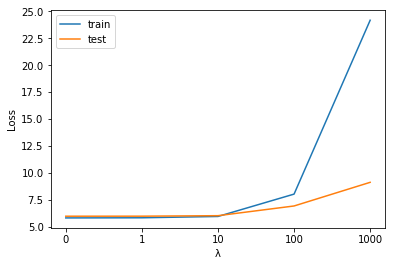

In [32]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(list(range(5)), loss_by_lamda[::-1])
ax.plot(list(range(5)), [9.11374, 6.91628, 6.01404, 5.96748, 5.96405][::-1])

#### (2) 抽全部5小時內pm2.5的一次項當作feature(加bias)])
ax.ticklabel_format(useOffset=False)
plt.xticks(list(range(5)), [str(i) for i in lamdas][::-1])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

使用9小時內PM2.5一次項作為feature重做一次(λ=0.1、0.01、0.001、0.0001)

In [33]:
raw_data = np.genfromtxt('../input/ml2019spring-hw1/train.csv', encoding = 'unicode_escape', delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  
    
lamdas = [0.1, 0.01, 0.001, 0.0001, 0]
loss_by_lamda = []
w_by_lamda = []
 
for index, lamda in enumerate(lamdas):
    x = np.empty(shape = (12 * 471 , 9),dtype = float)
    y = np.empty(shape = (12 * 471 , 1),dtype = float)
    for month in range(12): 
        for day in range(20): 
            for hour in range(24):   
                if day == 19 and hour > 14:
                    continue
                x[month * 471 + day * 24 + hour,:] = month_to_data[month][9, day * 24 + hour : day * 24 + hour + 9].reshape(1,-1) 
                y[month * 471 + day * 24 + hour,0] = month_to_data[month][9, day * 24 + hour + 9]
    print(x.shape, y.shape)
    mean = np.mean(x, axis = 0) 
    std = np.std(x, axis = 0)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if not std[j] == 0 :
                x[i][j] = (x[i][j]- mean[j]) / std[j]
    dim = x.shape[1] + 1 
    w = np.zeros(shape = (dim, 1 ))
    x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    learning_rate = np.array([[200]] * dim)
    adagrad_sum = np.zeros(shape = (dim, 1 ))
    loss = []
    for T in range(10000):
        if(T % 500 == 0 ):
            print("T=",T)
            print("Loss:", np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        loss.append(np.power((np.sum(np.power(x.dot(w) - y, 2 )) + lamda * np.sum(np.power(w, 2)))/ x.shape[0], 0.5))
        gradient = (-2) * np.transpose(x).dot(y-x.dot(w)) + 2 * lamda * w #use np.sum(w) or w ? https://ntumlta2019.github.io/ml-web-hw2/LogisticRegression.html
        adagrad_sum += gradient ** 2
        w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)
    loss_by_lamda.append(loss[-1])
    w_by_lamda.append(w)

(5652, 9) (5652, 1)
T= 0
Loss: 27.071214829194115
T= 500
Loss: 6.134600371278934
T= 1000
Loss: 6.12468877736046
T= 1500
Loss: 6.1244535590750795
T= 2000
Loss: 6.124446999386097
T= 2500
Loss: 6.124446778654558
T= 3000
Loss: 6.124446769934171
T= 3500
Loss: 6.124446769552998
T= 4000
Loss: 6.12444676953545
T= 4500
Loss: 6.124446769534624
T= 5000
Loss: 6.124446769534584
T= 5500
Loss: 6.124446769534583
T= 6000
Loss: 6.124446769534583
T= 6500
Loss: 6.124446769534583
T= 7000
Loss: 6.124446769534583
T= 7500
Loss: 6.124446769534583
T= 8000
Loss: 6.1244467695345834
T= 8500
Loss: 6.124446769534582
T= 9000
Loss: 6.124446769534583
T= 9500
Loss: 6.124446769534583
(5652, 9) (5652, 1)
T= 0
Loss: 27.071214829194115
T= 500
Loss: 6.133349397239059
T= 1000
Loss: 6.123407420283097
T= 1500
Loss: 6.123170930018943
T= 2000
Loss: 6.1231643192666985
T= 2500
Loss: 6.1231640962872
T= 3000
Loss: 6.123164087457101
T= 3500
Loss: 6.123164087070223
T= 4000
Loss: 6.1231640870523725
T= 4500
Loss: 6.123164087051529
T= 500

In [34]:
test_raw_data = np.genfromtxt('../input/ml2019spring-hw1/test.csv', encoding = 'unicode_escape', delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 
test_x = np.empty(shape = (240, 9),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[i * 18 + 9,:].reshape(1,-1) 

for i in range(test_x.shape[0]):        ##Normalization
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)

for i, w in enumerate(w_by_lamda):
    answer = test_x.dot(w)
    f = open('submission{}.csv'.format(i),"w")
    wr = csv.writer(f)
    title = ['id','value']
    wr.writerow(title) 
    for i in range(240):
        content = ['id_'+str(i),answer[i][0]]
        wr.writerow(content) 

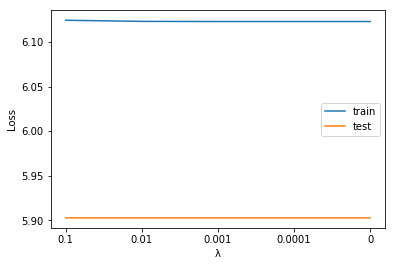

In [35]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(list(range(5)), loss_by_lamda)
ax.plot(list(range(5)), [5.90266, 5.90263, 5.90263, 5.90263, 5.90263])
ax.ticklabel_format(useOffset=False)
plt.xticks(list(range(5)), [str(i) for i in lamdas])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()